In [1]:
from scripts.interneuron_placement import Pickle

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def distance(pickle_1, pickle_2):
    return np.sqrt((pickle_1.x - pickle_2.x)**2+(pickle_1.y - pickle_2.y)**2)

In [4]:
def contains(pickle, XX, YY):
    d1, d2 = distance_to_points(pickle, XX, YY)
    return d1+d2 < pickle.c
    

In [5]:
def distance_to_points(pickle, XX, YY):
    x_p_1, y_p_1 = pickle.get_p1()
    x_p_2, y_p_2 = pickle.get_p2()
    
    d1 = np.sqrt((XX-x_p_1)**2 + (YY-y_p_1)**2)
    d2 = np.sqrt((XX-x_p_2)**2 + (YY-y_p_2)**2)
    return d1, d2

In [6]:
def get_overlap(pickle_1, pickle_2, ds = 0.1):
    if distance(pickle_1, pickle_2) > 2*(max(pickle_1.a, pickle_1.b)+max(pickle_2.a, pickle_2.b)):
        overlap = 0
    else:
        bb_x_min = pickle_1.x - max(pickle_1.a, pickle_1.b)
        bb_x_max = pickle_1.x + max(pickle_1.a, pickle_1.b)
        bb_y_min = pickle_1.y - max(pickle_1.a, pickle_1.b)
        bb_y_max = pickle_1.y + max(pickle_1.a, pickle_1.b)
        bb_X, bb_Y = np.meshgrid(np.arange(bb_x_min, bb_y_max,ds), np.arange(bb_y_min, bb_y_max, ds))
        in_1 = contains(pickle_1, bb_X, bb_Y)
        in_2 = contains(pickle_2, bb_X, bb_Y)
        overlap = np.sum(np.logical_and(in_1, in_2))*ds**2
    return overlap
    

In [7]:
e1 = Pickle(25, 50, 40, 20, 0.0)
e2 = Pickle(75, 50, 40, 20, np.pi/2.0)


(0, 100)

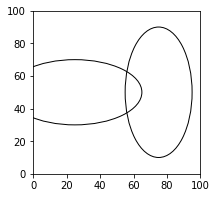

In [13]:
fig, ax = plt.subplots(1,1, figsize=(3,3))

ax.add_artist(e1.get_ellipse())
ax.add_artist(e2.get_ellipse())
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)


In [9]:
e1.get_area()

2513.2741228718346

In [10]:
get_overlap(e1, e1, ds = 0.5)

2507.25

In [11]:
get_overlap(e1, e1, ds = 0.05)

2513.1475000000005

In [12]:
get_overlap(e1, e2, ds=0.05)

172.11500000000004